## Data and packages loading

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC, OneClassSVM
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import dbscan, DBSCAN
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import TruncatedSVD, IncrementalPCA, PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.io import arff
from sklearn.metrics import roc_auc_score, silhouette_score, homogeneity_score, completeness_score, v_measure_score, f1_score, precision_score, recall_score, adjusted_rand_score, accuracy_score, precision_recall_curve
#from pandas_profiling import ProfileReport

import os
#print(os.listdir("../input"))

In [21]:
data, meta = arff.loadarff("../input/ALOI_withoutdupl_norm.arff")

df = pd.DataFrame(data)

## EDA

Firstly, let's see what variables our data is made up from. So, we have 29 columns in total, 27 of them are attributes that are a type of numeric and 1 is id number, also 1 column is our target that indicates whether the observation is outlier or not and has a type 'object'. Moreover, all variables are presented without null objects.

In [22]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,outlier,id
0,0.784999,0.000018,0.0,0.000093,0.0,0.0,0.0,0.0,0.0,0.139811,0.000031,0.0,0.019532,0.014259,0.0,0.000013,0.000239,0.0,0.048171,0.001189,0.0,0.115728,0.023449,0.0002,0.000220,0.034952,0.046914,"b""'yes'""",1.0
1,0.958088,0.000000,0.0,0.001671,0.0,0.0,0.0,0.0,0.0,0.019556,0.000000,0.0,0.034672,0.001610,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.022035,0.007516,0.0000,0.000000,0.001033,0.000000,"b""'yes'""",2.0
2,0.938768,0.000000,0.0,0.005146,0.0,0.0,0.0,0.0,0.0,0.018451,0.000016,0.0,0.042842,0.002299,0.0,0.000000,0.000080,0.0,0.000000,0.000000,0.0,0.035542,0.011982,0.0000,0.001595,0.019520,0.000000,"b""'yes'""",3.0
3,0.954775,0.000000,0.0,0.001427,0.0,0.0,0.0,0.0,0.0,0.024944,0.000016,0.0,0.043125,0.000735,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.019941,0.000805,0.0000,0.000000,0.000035,0.000000,"b""'yes'""",4.0
4,0.933601,0.000000,0.0,0.001682,0.0,0.0,0.0,0.0,0.0,0.037002,0.000000,0.0,0.048182,0.000704,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.046759,0.002663,0.0000,0.000339,0.001359,0.000000,"b""'yes'""",5.0


In [23]:
encode = LabelEncoder() 
df.outlier = encode.fit_transform(df.outlier) # to simplify further operations

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49534 entries, 0 to 49533
Data columns (total 29 columns):
att1       49534 non-null float64
att2       49534 non-null float64
att3       49534 non-null float64
att4       49534 non-null float64
att5       49534 non-null float64
att6       49534 non-null float64
att7       49534 non-null float64
att8       49534 non-null float64
att9       49534 non-null float64
att10      49534 non-null float64
att11      49534 non-null float64
att12      49534 non-null float64
att13      49534 non-null float64
att14      49534 non-null float64
att15      49534 non-null float64
att16      49534 non-null float64
att17      49534 non-null float64
att18      49534 non-null float64
att19      49534 non-null float64
att20      49534 non-null float64
att21      49534 non-null float64
att22      49534 non-null float64
att23      49534 non-null float64
att24      49534 non-null float64
att25      49534 non-null float64
att26      49534 non-null float64
att27  

Now let's take a look at descriptive statistics of numeric variables, all of attributes are numbers that range from 0 to 1, and most attributes have a significant dominance of zeros.

In [25]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,outlier,id
count,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000,49534.000000
mean,0.830656,0.011929,0.001878,0.005562,0.010676,0.004287,0.000182,0.001629,0.002159,0.054785,0.003045,0.001017,0.039166,0.032721,0.006277,0.002769,0.006562,0.006000,0.019186,0.001612,0.000194,0.040778,0.019520,0.002293,0.022375,0.047417,0.047133,0.030444,24969.934550
std,0.136604,0.051645,0.024246,0.026963,0.045020,0.029679,0.005069,0.019139,0.026364,0.076228,0.021687,0.014668,0.061323,0.063184,0.039822,0.027256,0.035587,0.031913,0.065318,0.017208,0.009467,0.090239,0.045489,0.014051,0.068463,0.089048,0.096755,0.171807,14432.079807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.755428,0.000000,0.000000,0.000029,0.000000,0.000000,0.000000,0.000000,0.000000,0.006005,0.000000,0.000000,0.004830,0.000658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000133,0.000655,0.000000,0.000000,0.001382,0.000524,0.000000,12474.250000
50%,0.868093,0.000083,0.000000,0.000389,0.000128,0.000000,0.000000,0.000000,0.000000,0.026816,0.000218,0.000000,0.018167,0.008066,0.000022,0.000000,0.000532,0.000017,0.000069,0.000000,0.000000,0.004033,0.004703,0.000200,0.000101,0.011960,0.005811,0.000000,24959.500000
75%,0.934900,0.002049,0.000000,0.002094,0.002648,0.000000,0.000000,0.000000,0.000000,0.072143,0.001119,0.000000,0.048864,0.034563,0.000999,0.000050,0.003219,0.000570,0.007507,0.000155,0.000000,0.035952,0.018768,0.001323,0.005307,0.052602,0.046678,0.000000,37450.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000


Also, there is a small number of observations that represent 'outliers', what should be noticed when building classifiers and spliting.

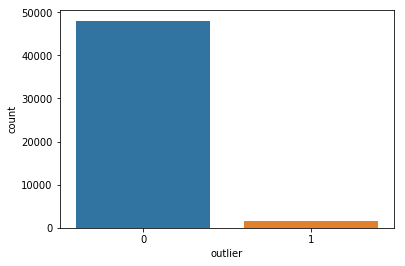

In [26]:
sns.countplot(df.outlier)
plt.show()

Let's see if there is any correlation between attribute features. According to color of plot's cells, att1 and att5 features probably have correlations with some other features, so it would be better to look at them closer.

In [27]:
corr_matrix = df.drop(columns=['id', 'outlier']).corr()
#matrix

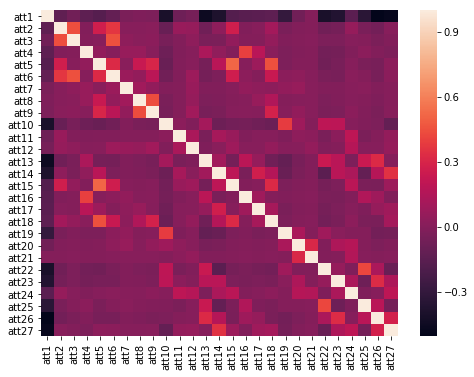

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix)
plt.show()

Well, the highest correlation coefficient is equal to = 0.51 that shows more or less medium correlation between att1 and att26. Personally, I don't think that it is significant value, but probably it should be taken into account.

In [29]:
corr_matrix['att5']

att1    -0.164932
att2     0.269850
att3     0.010321
att4     0.044115
att5     1.000000
att6     0.320000
att7     0.014166
att8     0.231649
att9     0.304569
att10   -0.094140
att11   -0.006769
att12    0.010522
att13   -0.047925
att14    0.178984
att15    0.512449
att16    0.003196
att17    0.078855
att18    0.447473
att19   -0.023479
att20   -0.001690
att21   -0.003017
att22   -0.069654
att23   -0.043569
att24    0.006285
att25   -0.030785
att26   -0.042274
att27    0.025919
Name: att5, dtype: float64

Now let's create plots that will visualize distributions of each class among all features. According to plots we can identify that in many features outliers have a higher frequency at certain values of attributes.

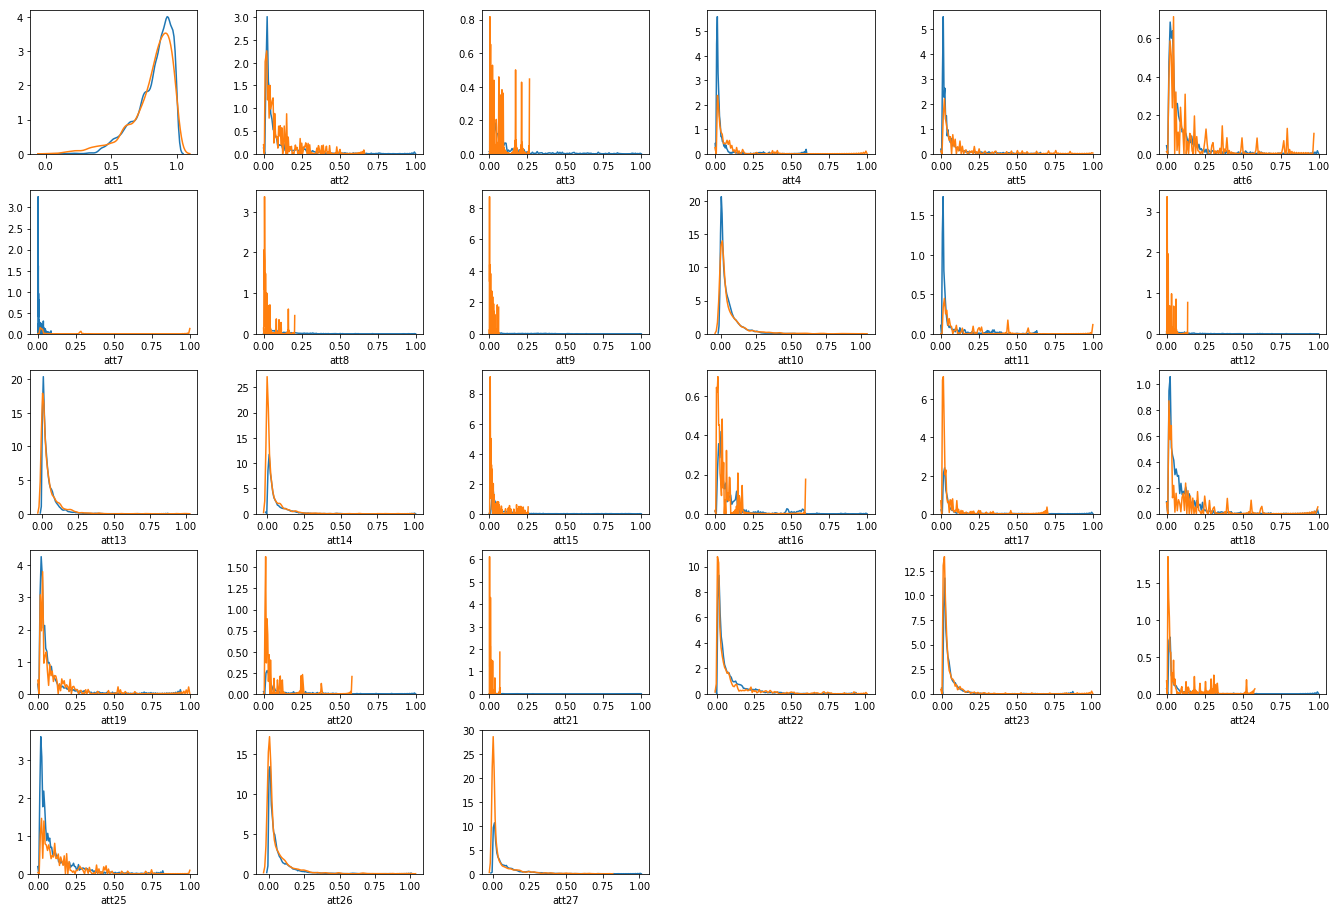

In [30]:
for index, colname in enumerate(df.drop(columns=['id', 'outlier']), 1):
    plt.subplot(5, 6, index)
    sns.distplot(df[colname][df.outlier == 0], hist=False)
    sns.distplot(df[colname][df.outlier == 1], hist=False)
plt.subplots_adjust(top=3, bottom=0, left=0, right=3, hspace=0.25, wspace=0.35)
plt.show()

Let's also try to visualize the data in plot using dimensionality reduction.

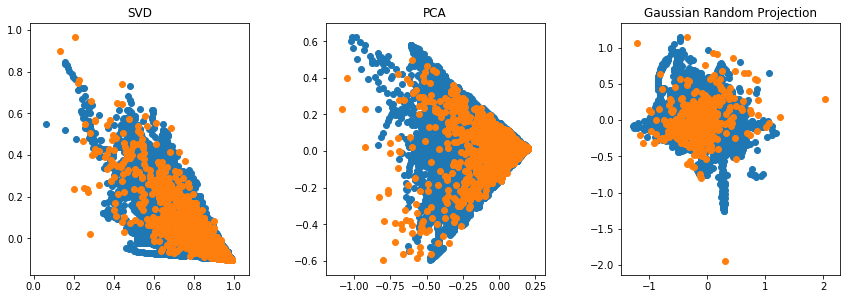

In [31]:
svd = TruncatedSVD(n_components=2)
pca = IncrementalPCA(n_components=2)
gaus_rand = GaussianRandomProjection(n_components=2)
labels = ['SVD', 'PCA', 'Gaussian Random Projection']

for index, reduction in enumerate([svd, pca, gaus_rand], 1):
    reduced_df = reduction.fit_transform(df.drop(columns=['id', 'outlier']))
    reduced_df = pd.DataFrame(reduced_df)
    reduced_df['outlier'] = df.outlier
    plt.subplot(1,3, index)
    plt.title(labels[index-1])
    plt.scatter(reduced_df[0][reduced_df['outlier'] == 0], reduced_df[1][reduced_df['outlier'] == 0])
    plt.scatter(reduced_df[0][reduced_df['outlier'] == 1], reduced_df[1][reduced_df['outlier'] == 1])
    
plt.subplots_adjust(top=1, right=2, wspace=0.35)
plt.show()

So, according to plots it probably will be difficult for unsupervised algorithms to find identify outliers. 

## Data preprocessing

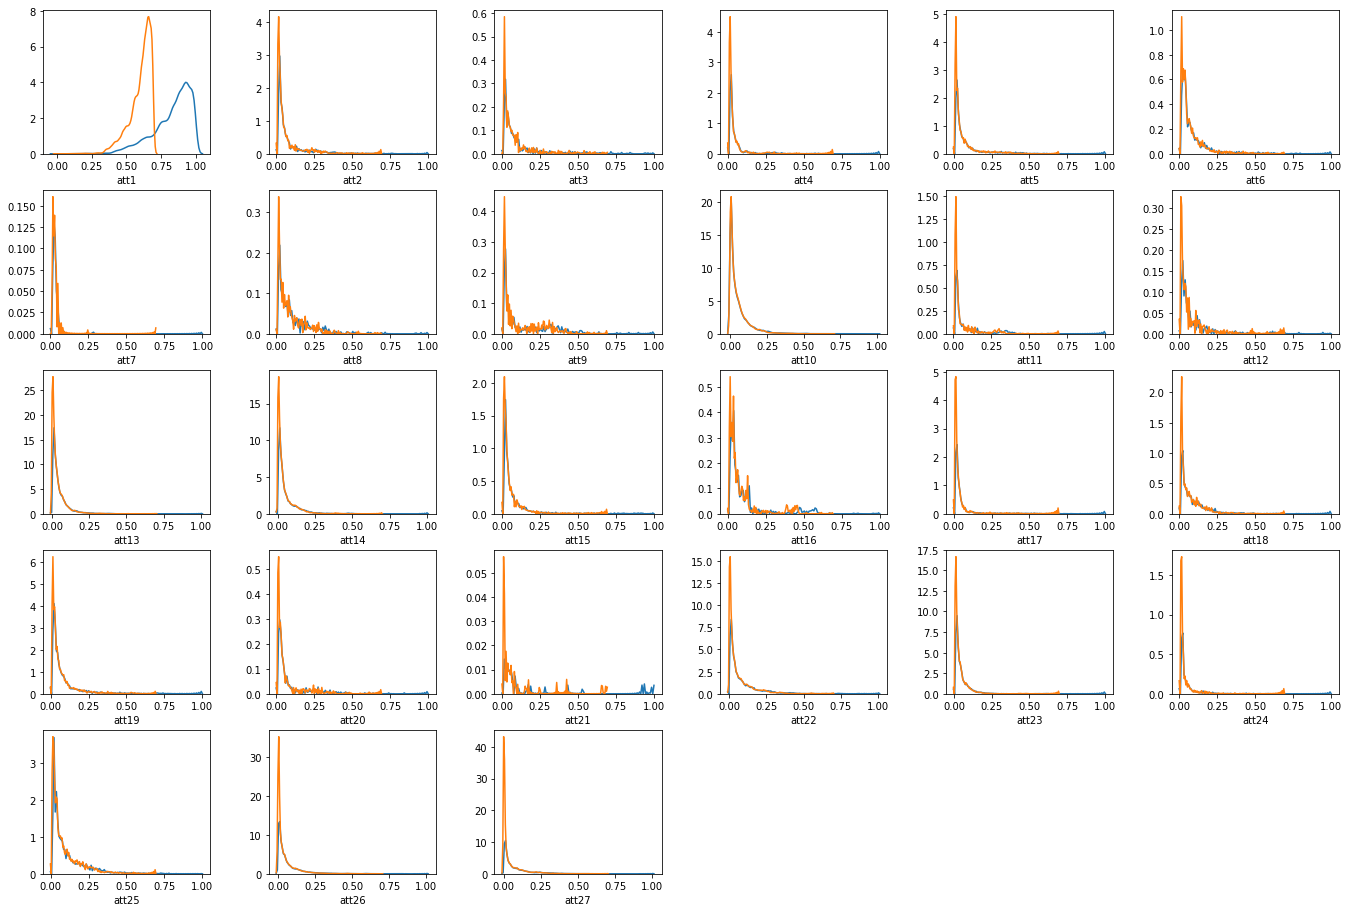

In [32]:
for index, colname in enumerate(df.drop(columns=['id', 'outlier']), 1):
    plt.subplot(5, 6, index)
    sns.distplot(df[colname], hist=False, norm_hist=True)
    sns.distplot(np.log(df[colname]+1), hist=False, norm_hist=True)
plt.subplots_adjust(top=3, bottom=0, left=0, right=3, hspace=0.25, wspace=0.35)
plt.show()

Now tails of distributions are not so far from the rest values as they were before, but still, distributions do not remind gaussian. However, I will apply log transformation and save transformed data to the new varible.  

In [33]:
log_df = df.copy()
for colname in log_df.drop(columns=['id', 'outlier']):
    log_df[colname] = np.log(log_df[colname]+1)

I suppose, that for supervised algorithms it would be better to scale data.

In [34]:
scale = StandardScaler()

std_df = pd.DataFrame(scale.fit_transform(df.drop(columns=['id', 'outlier'])))
std_df['id'], std_df['outlier'] = df.id, df.outlier

log_std_df = pd.DataFrame(scale.fit_transform(log_df.drop(columns=['id', 'outlier'])))
log_std_df['id'], log_std_df['outlier'] = df.id, df.outlier

## Supervised learning

In [35]:
cv = StratifiedKFold(n_splits=4,shuffle=True, random_state=42)
scores = ['roc_auc', 'precision_weighted', 'recall_weighted', 'f1_weighted']

### Logistic regression


In [36]:
reg = LogisticRegression(solver='saga', class_weight='balanced') #saga as dataset is quite big, sklearn: '‘saga’ are faster for large ones'
reg_params = {'C': [0.1, 1, 2, 5, 10], 'penalty': ['l1', 'l2', None]}
grid_reg = GridSearchCV(reg, reg_params, scores, n_jobs=-1, cv=cv, refit=False)

In [37]:
%%time
grid_reg.fit(log_std_df.drop(columns=['id', 'outlier']), log_std_df.outlier)

CPU times: user 1.86 s, sys: 724 ms, total: 2.58 s
Wall time: 1min 26s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 2, 5, 10], 'penalty': ['l1', 'l2', None]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['roc_auc', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
       verbose=0)

In [38]:
reg_results = pd.DataFrame(grid_reg.cv_results_)
reg_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_train_precision_weighted,split1_train_precision_weighted,split2_train_precision_weighted,split3_train_precision_weighted,mean_train_precision_weighted,std_train_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_train_recall_weighted,split1_train_recall_weighted,split2_train_recall_weighted,split3_train_recall_weighted,mean_train_recall_weighted,std_train_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_train_f1_weighted,split1_train_f1_weighted,split2_train_f1_weighted,split3_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,40.957038,3.575175,1.788682,1.318264,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.612754,0.609478,0.590838,0.584365,0.599359,0.012034,5,0.613209,0.596780,0.625689,0.613460,0.612285,0.010275,0.949063,0.948152,0.947947,0.946040,0.947801,0.001100,10,0.949098,0.948139,0.949870,0.948236,0.948836,0.000704,0.665455,0.660287,0.614471,0.687152,0.656842,0.026457,11,0.664334,0.658977,0.617884,0.691421,0.658154,0.026302,0.773695,0.770001,0.735683,0.789306,0.767171,0.019570,11,0.772879,0.769046,0.738117,0.792219,0.768065,0.019394
1,33.911252,4.542142,1.245511,0.223294,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.612790,0.606327,0.595566,0.580385,0.598767,0.012267,14,0.613488,0.596439,0.620826,0.612187,0.610735,0.008887,0.948938,0.948056,0.948692,0.945497,0.947796,0.001366,11,0.949123,0.947758,0.949893,0.948542,0.948829,0.000782,0.665294,0.657784,0.649277,0.685052,0.664352,0.013226,1,0.665007,0.656366,0.655406,0.687276,0.666014,0.012833,0.773585,0.768183,0.761890,0.787852,0.772878,0.009585,1,0.773365,0.767166,0.766315,0.789297,0.774036,0.009222
2,32.157561,1.111824,0.848300,0.165093,0.1,None,"{'C': 0.1, 'penalty': None}",0.612790,0.606327,0.595566,0.580385,0.598767,0.012267,14,0.613488,0.596439,0.620826,0.612187,0.610735,0.008887,0.948938,0.948056,0.948692,0.945497,0.947796,0.001366,11,0.949123,0.947758,0.949893,0.948542,0.948829,0.000782,0.665294,0.657784,0.649277,0.685052,0.664352,0.013226,1,0.665007,0.656366,0.655406,0.687276,0.666014,0.012833,0.773585,0.768183,0.761890,0.787852,0.772878,0.009585,1,0.773365,0.767166,0.766315,0.789297,0.774036,0.009222
3,44.109726,2.642136,0.561563,0.337623,1,l1,"{'C': 1, 'penalty': 'l1'}",0.614267,0.611045,0.589309,0.586034,0.600164,0.012597,2,0.611089,0.597646,0.626232,0.613601,0.612142,0.010148,0.949804,0.948650,0.946801,0.945968,0.947806,0.001508,8,0.949733,0.947919,0.950751,0.948407,0.949203,0.001113,0.585514,0.657623,0.556812,0.682468,0.620604,0.051230,12,0.586057,0.653297,0.559474,0.687788,0.621654,0.051256,0.712671,0.768025,0.689603,0.786013,0.739078,0.039325,12,0.713115,0.764907,0.691248,0.789662,0.739733,0.039325
4,36.147976,1.205880,1.422599,0.890590,1,l2,"{'C': 1, 'penalty': 'l2'}",0.613422,0.606635,0.595349,0.580857,0.599066,0.012336,7,0.613273,0.596473,0.621147,0.612367,0.610815,0.008957,0.948887,0.948053,0.948639,0.945736,0.947829,0.001246,2,0.949280,0.947798,0.949951,0.948521,0.948888,0.000807,0.644703,0.657703,0.647904,0.685294,0.658901,0.015973,3,0.645437,0.656366,0.653684,0.687734,0.660805,0.016060,0.758489,0.768124,0.760879,0.788013,0.768876,0.011604,3,0.759002,0.767163,0.765046,0.789620,0.770208,0.011601
5,36.446233,1.

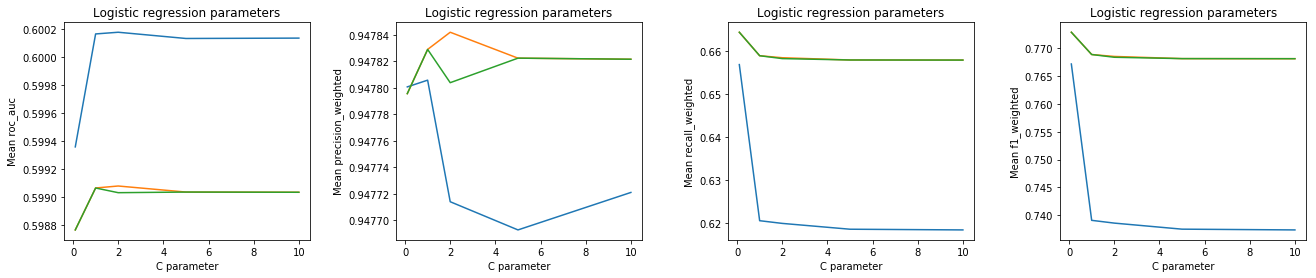

In [39]:
x1 = reg_results.param_C[reg_results.param_penalty == 'l1'].astype(float)
x2 = reg_results.param_C[reg_results.param_penalty == 'l2'].astype(float)
x3 = reg_results.param_C[reg_results.param_penalty.isnull()].astype(float)
for index, score in enumerate(scores, 1):
    plt.subplot(1, 4, index)
    y1 = reg_results['mean_test_' + score][reg_results.param_penalty == 'l1'].astype(float)
    y2 = reg_results['mean_test_' + score][reg_results.param_penalty == 'l2'].astype(float)
    y3 = reg_results['mean_test_' + score][reg_results.param_penalty.isnull()].astype(float)
    plt.plot(x1, y1)
    plt.plot(x2, y2)
    plt.plot(x3, y3)
    plt.title('Logistic regression parameters')
    plt.xlabel('C parameter')
    plt.ylabel('Mean '+score)
plt.subplots_adjust(right=3, wspace=0.35)
plt.show()

According to results, we see that the best parameters from those that I've put in a grid search for logistic regression are C = 10, penaly = l1 respectively the mean ROC-AUC on cross-validation is only ~0.60, however there is no significant range in metrics due to tuning parameters

### SVM

In [40]:
svm = SVC(class_weight='balanced')
svm_params = {'gamma': [0.001, 0.01, 'auto']}
grid_svm = GridSearchCV(svm, svm_params, scores, cv=cv, n_jobs=-1, refit=False)

In [41]:
%%time
grid_svm.fit(std_df.drop(columns=['id', 'outlier']), std_df.outlier)

CPU times: user 4.22 s, sys: 3.02 s, total: 7.24 s
Wall time: 34min 32s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': [0.001, 0.01, 'auto']},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['roc_auc', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
       verbose=0)

In [42]:
svm_results = pd.DataFrame(grid_svm.cv_results_)
svm_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_train_precision_weighted,split1_train_precision_weighted,split2_train_precision_weighted,split3_train_precision_weighted,mean_train_precision_weighted,std_train_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_train_recall_weighted,split1_train_recall_weighted,split2_train_recall_weighted,split3_train_recall_weighted,mean_train_recall_weighted,std_train_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_train_f1_weighted,split1_train_f1_weighted,split2_train_f1_weighted,split3_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,564.197610,4.837154,441.551949,5.386268,0.001,{'gamma': 0.001},0.597028,0.602731,0.603156,0.571706,0.593656,0.012901,3,0.606129,0.599689,0.615726,0.614495,0.609010,0.006526,0.945697,0.946318,0.946818,0.945028,0.945965,0.000671,3,0.946351,0.946213,0.947041,0.946832,0.946609,0.000339,0.841005,0.841247,0.838650,0.844626,0.841382,0.002130,1,0.842934,0.841238,0.840704,0.844661,0.842384,0.001551,0.887853,0.888105,0.886662,0.889845,0.888116,0.001137,1,0.889100,0.888081,0.887911,0.890198,0.888822,0.000915
1,537.080900,19.025851,393.426637,4.880335,0.01,{'gamma': 0.01},0.669580,0.670629,0.661161,0.647268,0.662159,0.009348,2,0.701683,0.705161,0.703942,0.712747,0.705884,0.004155,0.950395,0.950476,0.951387,0.947857,0.950029,0.001313,2,0.952422,0.952260,0.952723,0.952713,0.952529,0.000197,0.809593,0.806202,0.816926,0.818703,0.812856,0.005140,3,0.813244,0.812571,0.816721,0.827515,0.817512,0.005986,0.869657,0.867579,0.874254,0.874910,0.871600,0.003080,3,0.872109,0.871679,0.874276,0.880858,0.874730,0.003672
2,465.207493,9.357384,349.333483,3.263496,auto,{'gamma': 'auto'},0.727629,0.712917,0.722473,0.710767,0.718447,0.006894,1,0.790837,0.791766,0.789859,0.791501,0.790991,0.000736,0.952276,0.952785,0.954656,0.952674,0.953098,0.000920,1,0.957906,0.957885,0.957725,0.958104,0.957905,0.000135,0.829457,0.832041,0.838165,0.826536,0.831550,0.004287,2,0.838223,0.833917,0.839762,0.835213,0.836779,0.002325,0.881980,0.883608,0.887556,0.880258,0.883351,0.002702,2,0.888012,0.885381,0.888926,0.886200,0.887130,0.001408


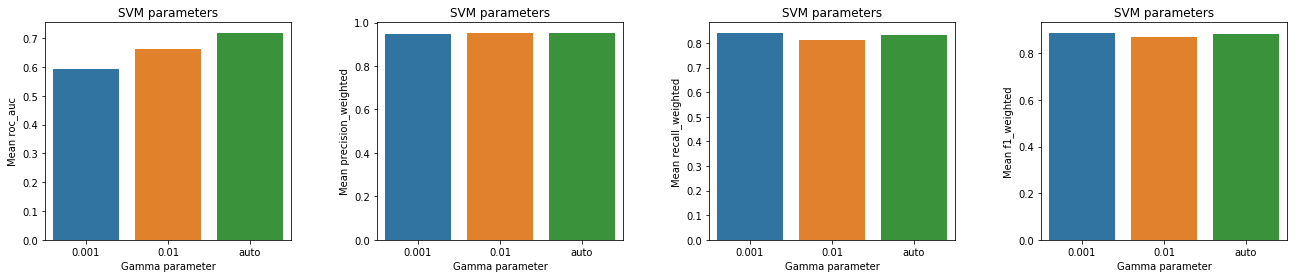

In [43]:
for index, score in enumerate(scores, 1):
    plt.subplot(1, 4, index)
    sns.barplot(x=svm_results.param_gamma, y=svm_results['mean_test_'+score])
    plt.title('SVM parameters')
    plt.xlabel('Gamma parameter')
    plt.ylabel('Mean '+score)
plt.subplots_adjust(right=3, wspace=0.35)
plt.show()

Well, SVM algorithm shows better performance on the all metrics, and ROC-AUC reaches ~0.72, what is quite better than logistic regression did.

### KNN

In [44]:
knn = KNeighborsClassifier(weights='distance')
knn_params = {'n_neighbors': [3, 5, 7]}#, 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn, knn_params,scores, cv=cv, n_jobs=-1, refit=False)

In [45]:
%%time
grid_knn.fit(std_df.drop(columns=['id', 'outlier']), std_df.outlier)

CPU times: user 1.99 s, sys: 1.64 s, total: 3.64 s
Wall time: 14min 21s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 7]}, pre_dispatch='2*n_jobs',
       refit=False, return_train_score='warn',
       scoring=['roc_auc', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
       verbose=0)

In [46]:
knn_results = pd.DataFrame(grid_knn.cv_results_)
knn_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_train_precision_weighted,split1_train_precision_weighted,split2_train_precision_weighted,split3_train_precision_weighted,mean_train_precision_weighted,std_train_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_train_recall_weighted,split1_train_recall_weighted,split2_train_recall_weighted,split3_train_recall_weighted,mean_train_recall_weighted,std_train_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_train_f1_weighted,split1_train_f1_weighted,split2_train_f1_weighted,split3_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,11.737423,1.160048,198.140083,9.103893,3,{'n_neighbors': 3},0.703955,0.707579,0.703756,0.720180,0.708867,0.006706,3,1.0,1.0,1.0,1.0,1.0,0.0,0.965901,0.965418,0.967723,0.967326,0.966592,0.000958,1,1.0,1.0,1.0,1.0,1.0,0.0,0.972545,0.972303,0.973351,0.973189,0.972847,0.000435,1,1.0,1.0,1.0,1.0,1.0,0.0,0.965299,0.964687,0.966150,0.966029,0.965541,0.000591,1,1.0,1.0,1.0,1.0,1.0,0.0
1,13.311880,1.183245,222.220799,9.163147,5,{'n_neighbors': 5},0.719979,0.731733,0.737822,0.750022,0.734888,0.010838,2,1.0,1.0,1.0,1.0,1.0,0.0,0.967096,0.963726,0.967452,0.966495,0.966192,0.001465,3,1.0,1.0,1.0,1.0,1.0,0.0,0.972464,0.971334,0.972624,0.972139,0.972140,0.000497,2,1.0,1.0,1.0,1.0,1.0,0.0,0.963183,0.961346,0.963497,0.962431,0.962614,0.000829,2,1.0,1.0,1.0,1.0,1.0,0.0
2,12.775327,0.827580,236.689392,7.287772,7,{'n_neighbors': 7},0.730678,0.748129,0.755144,0.769232,0.750795,0.013880,1,1.0,1.0,1.0,1.0,1.0,0.0,0.966301,0.965281,0.966800,0.966753,0.966284,0.000611,2,1.0,1.0,1.0,1.0,1.0,0.0,0.971657,0.971011,0.971735,0.971332,0.971434,0.000287,3,1.0,1.0,1.0,1.0,1.0,0.0,0.960878,0.959119,0.960928,0.959697,0.960155,0.000775,3,1.0,1.0,1.0,1.0,1.0,0.0


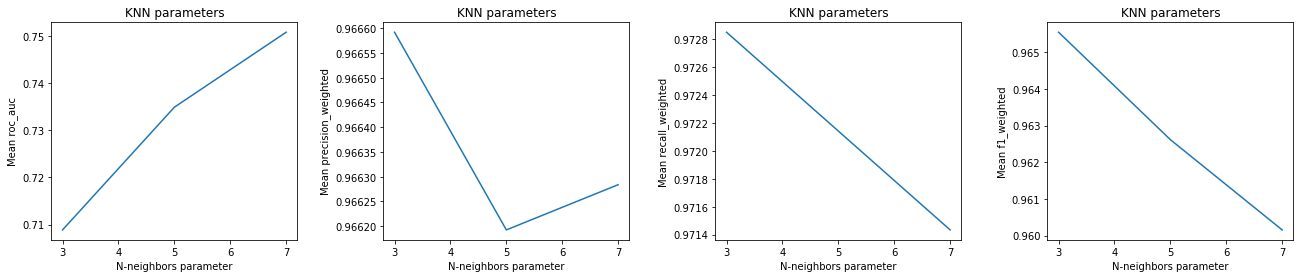

In [47]:
x=knn_results.param_n_neighbors.astype(float)
for index, score in enumerate(scores, 1):
    y=knn_results['mean_test_'+score].astype(float)
    plt.subplot(1, 4, index)
    plt.plot(x,y)
    plt.title('KNN parameters')
    plt.xlabel('N-neighbors parameter')
    plt.ylabel('Mean '+score)
plt.subplots_adjust(right=3, wspace=0.35)
plt.show()

As for KNN, the quality of predictions (roc auc) rises with increasing the number of neighbours, while other metrics remains stable (or with a small range).

### Random Forest

In [48]:
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest_params = {'n_estimators': [10, 15, 20, 30], 'max_depth': [5, 10, 15, 20], 'max_features': ['sqrt', 'log2', None]}
grid_random_forest = GridSearchCV(random_forest, random_forest_params, scores, cv=cv, n_jobs=-1, refit=False)

In [49]:
%%time
grid_random_forest.fit(std_df.drop(columns=['id', 'outlier']), std_df.outlier)

CPU times: user 5.46 s, sys: 1.2 s, total: 6.67 s
Wall time: 4min 24s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 15, 20, 30], 'max_depth': [5, 10, 15, 20], 'max_features': ['sqrt', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['roc_auc', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
       verbose=0)

In [50]:
random_forest_results = pd.DataFrame(grid_random_forest.cv_results_)
random_forest_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_train_precision_weighted,split1_train_precision_weighted,split2_train_precision_weighted,split3_train_precision_weighted,mean_train_precision_weighted,std_train_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_train_recall_weighted,split1_train_recall_weighted,split2_train_recall_weighted,split3_train_recall_weighted,mean_train_recall_weighted,std_train_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted,split0_train_f1_weighted,split1_train_f1_weighted,split2_train_f1_weighted,split3_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,1.402803,0.306783,0.679024,0.181482,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.728829,0.747111,0.696320,0.724651,0.724228,0.018192,47,0.800383,0.808326,0.805326,0.801260,0.803824,0.003199,0.954546,0.956345,0.954022,0.954932,0.954961,0.000862,24,0.959333,0.960285,0.960747,0.960519,0.960221,0.000538,0.750888,0.756056,0.712348,0.745700,0.741248,0.017083,44,0.756851,0.756635,0.720411,0.755673,0.747392,0.015584,0.832543,0.835981,0.806578,0.829114,0.826054,0.011503,44,0.836559,0.836432,0.811985,0.835798,0.830193,0.010517
1,2.924470,0.594465,1.250825,0.229085,5,sqrt,15,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.739740,0.741263,0.700919,0.736783,0.729677,0.016681,42,0.812880,0.811970,0.810587,0.817616,0.813263,0.002642,0.955347,0.955749,0.953793,0.955846,0.955184,0.000824,22,0.960641,0.960230,0.960760,0.961057,0.960672,0.000297,0.755572,0.772206,0.719616,0.757732,0.751282,0.019369,41,0.761884,0.772598,0.732147,0.769454,0.759021,0.015997,0.835641,0.846487,0.811564,0.837069,0.832691,0.012889,41,0.839902,0.846902,0.820013,0.844878,0.837924,0.010650
2,5.326162,1.026559,1.973928,0.255854,5,sqrt,20,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.740893,0.747001,0.710940,0.735097,0.733483,0.013679,39,0.820231,0.817787,0.814024,0.820925,0.818242,0.002700,0.955138,0.955869,0.953812,0.954713,0.954883,0.000744,26,0.961117,0.960385,0.960464,0.960736,0.960676,0.000286,0.755895,0.776082,0.731002,0.763305,0.756571,0.016433,40,0.763284,0.776958,0.741649,0.773842,0.763933,0.013828,0.835848,0.848990,0.819283,0.840678,0.836200,0.010839,40,0.840832,0.849739,0.826439,0.847729,0.841185,0.009132
3,9.572447,0.585707,3.002663,0.186428,5,sqrt,30,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.739206,0.749464,0.710150,0.734376,0.733299,0.014433,40,0.822845,0.820532,0.820101,0.821748,0.821307,0.001074,0.954903,0.955222,0.953505,0.954102,0.954433,0.000674,35,0.961194,0.960249,0.961081,0.960971,0.960874,0.000369,0.762355,0.789244,0.728337,0.761124,0.760266,0.021589,38,0.771925,0.791386,0.740761,0.777207,0.770320,0.018490,0.840067,0.857360,0.817487,0.839239,0.838539,0.014144,38,0.846494,0.859014,0.825840,0.849922,0.845317,0.012140
4,2.575114,0.422044,0.961255,0.228087,5,log2,10,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",0.728686,0.730824,0.690031,0.704659,0.713551,0.017027,48,0.795815,0.802302,0.795379,0.784624,0.794530,0.006343,0.954765,0.953579,0.952930,0.954163,0.953859,0.000681,39,0.959795,0.959129,0.960232,0.959443,0.959650,0.000410,0.714147,0.754845,0.670274,0.694420,0.708422,0.030981,48,0.722315,0

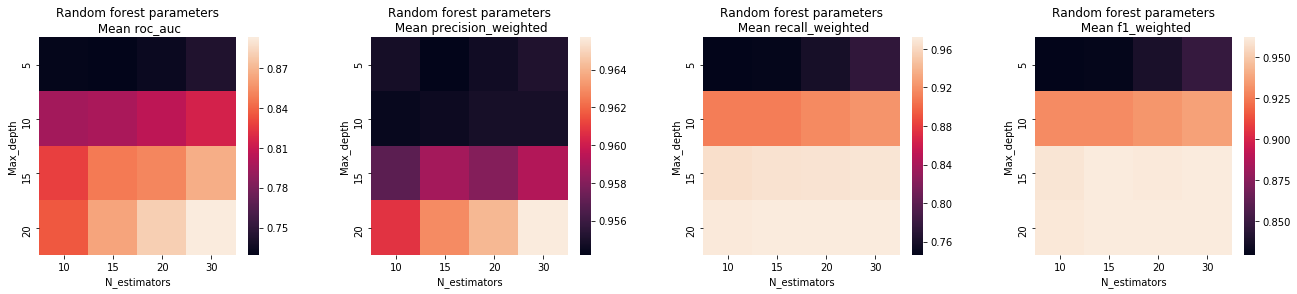

In [51]:
for index, score in enumerate(scores, 1):
    matrix = random_forest_results[random_forest_results['param_max_features'].isnull()].pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_'+score)
    plt.subplot(1, 4, index)
    sns.heatmap(matrix)
    plt.title('Random forest parameters\n Mean '+score)
    plt.xlabel('N_estimators')
    plt.ylabel('Max_depth')
plt.subplots_adjust(right=3, wspace=0.35)
plt.show()

Looking at heatmaps we can easily indicate that the more we have trees in model and the longer they are the higher scores we recieve for all of the metrics. Moreover, random forest performs much better in comparison with previous models.

## Unsupervised learning

As most of outlier detecting algorithms returns 1 and -1, probably it would be better to recode our true labels in more suitable form.


In [ ]:
true_labels = df.outlier.replace([1, 0], [-1, 1])

### DBSCAN

As DBSCAN requires too much memory, I'll try to perform it on a subset of data.

In [53]:
_, X_test, _, y_test = train_test_split(df.drop(columns=['id', 'outlier']), true_labels, stratify=true_labels, test_size=0.3)

In [54]:
%%time
for eps in [0.01, 0.1, 0.3, 0.5]:
    dbs = DBSCAN(eps=eps)
    dbs_pred = dbs.fit_predict(X_test)
    dbs_pred[dbs_pred != -1] = 1
    print( 'eps = ' + str(eps) )
    print( 'adjusted_rand_score: '+str(adjusted_rand_score(y_test, dbs_pred)) )
    print( 'silhouette_score: '+str(silhouette_score(X_test, dbs_pred)) )
    print( 'homogeneity_score: '+str(homogeneity_score(y_test, dbs_pred)) )
    print( 'completeness_score: '+str(completeness_score(y_test, dbs_pred)) )
    print( 'v_measure_score: '+str(v_measure_score(y_test, dbs_pred)) )

eps = 0.01
adjusted_rand_score: -0.018991806211048394
silhouette_score: 0.005003712021499556
homogeneity_score: 0.01770817174272327
completeness_score: 0.004052784443842742
v_measure_score: 0.006595978812007318
eps = 0.1
adjusted_rand_score: 0.06524650304449592
silhouette_score: 0.45012301866892973
homogeneity_score: 0.016162676818656938
completeness_score: 0.00898479926868018
v_measure_score: 0.011549342475232092
eps = 0.3
adjusted_rand_score: 0.032846315534707994
silhouette_score: 0.6634371615627043
homogeneity_score: 0.005547127261402429
completeness_score: 0.033547498001547195
v_measure_score: 0.009520093335826778
eps = 0.5
adjusted_rand_score: 0.003459537293668563
silhouette_score: 0.7230540425733859
homogeneity_score: 0.00046676683343100197
completeness_score: 0.01786152264340644
v_measure_score: 0.0009097593504353084
CPU times: user 1min 8s, sys: 12.2 s, total: 1min 20s
Wall time: 1min 7s


According to presented metrics the best fitted parameter eps relatively to adjusted rand index equals 0.1, while silhouette score increases with when higher eps values. However, this algorithm probably isn't suitable for current data, maybe others will perform better.

### One-class SVM

In [55]:
%%time
for nu in [0.01, 0.1, 0.3, 0.5]:
    oneclass = OneClassSVM(nu=nu, random_state=42, kernel='rbf')
    oneclass_pred = oneclass.fit_predict(std_df.drop(columns=['id', 'outlier']))
    print( 'nu = ' + str(nu) )
    print( 'adjusted_rand_score: '+str(adjusted_rand_score(true_labels, oneclass_pred)) )
    print( 'silhouette_score: '+str(silhouette_score(std_df.drop(columns=['id', 'outlier']), oneclass_pred)) )
    print( 'homogeneity_score: '+str(homogeneity_score(true_labels, oneclass_pred)) )
    print( 'completeness_score: '+str(completeness_score(true_labels, oneclass_pred)) )
    print( 'v_measure_score: '+str(v_measure_score(true_labels, oneclass_pred)) )

nu = 0.01
adjusted_rand_score: 0.05681099603460502
silhouette_score: 0.7628793642012005
homogeneity_score: 0.009138140795637694
completeness_score: 0.02075125449653838
v_measure_score: 0.012688639794938575
nu = 0.1
adjusted_rand_score: 0.017388057358039586
silhouette_score: 0.6189658037416889
homogeneity_score: 0.001964220342954541
completeness_score: 0.0008234853130367836
v_measure_score: 0.0011604572387438397
nu = 0.3
adjusted_rand_score: 0.008699966637452237
silhouette_score: 0.39400985095213403
homogeneity_score: 0.003418100534437717
completeness_score: 0.0007625681980817957
v_measure_score: 0.001246946329487218
nu = 0.5
adjusted_rand_score: 7.941580557040647e-05
silhouette_score: 0.17140993478231295
homogeneity_score: 0.002551006962888607
completeness_score: 0.0005015593773025468
v_measure_score: 0.0008382988745926805
CPU times: user 14min 41s, sys: 1min 48s, total: 16min 30s
Wall time: 13min 47s


Unfortunately, this method also has low scores on all metrics. Probably, there is something I've done wrong, and if I find what, I'll redo it as soon as possible

### Isolation Forest

In [56]:
contamination = sum(df.outlier == 1)/len(df)

In [57]:
%%time
for n in [100, 200, 300]:
    isoforest = IsolationForest(n_jobs=-1, max_features=1, n_estimators=n, contamination=contamination)
    isoforest_pred = isoforest.fit_predict(std_df.drop(columns=['id', 'outlier']))
    print( 'n_estimators = ' + str(n) )
    print( 'adjusted_rand_score: '+str(adjusted_rand_score(true_labels, isoforest_pred)) )
    print( 'silhouette_score: '+str(silhouette_score(std_df.drop(columns=['id', 'outlier']), isoforest_pred)) )
    print( 'homogeneity_score: '+str(homogeneity_score(true_labels, isoforest_pred)) )
    print( 'completeness_score: '+str(completeness_score(true_labels, isoforest_pred)) )
    print( 'v_measure_score: '+str(v_measure_score(true_labels, isoforest_pred)) )

n_estimators = 100
adjusted_rand_score: -0.010192296703838302
silhouette_score: 0.5175753708870361
homogeneity_score: 0.0004918619661193067
completeness_score: 0.0004918619661193067
v_measure_score: 0.0004918619661193067
n_estimators = 200
adjusted_rand_score: -0.010192296703838302
silhouette_score: 0.5146775550903049
homogeneity_score: 0.0004918619661193067
completeness_score: 0.0004918619661193067
v_measure_score: 0.0004918619661193067
n_estimators = 300
adjusted_rand_score: -0.010832376977500073
silhouette_score: 0.5001110784029481
homogeneity_score: 0.000560744537518397
completeness_score: 0.000560744537518397
v_measure_score: 0.000560744537518397
CPU times: user 3min 49s, sys: 1min 37s, total: 5min 27s
Wall time: 3min 18s


### Local outlier factor

In [58]:
%%time
for n in [2, 5, 10, 20]:
    lof = LocalOutlierFactor(n_neighbors=n, n_jobs=-1, contamination=contamination)
    lof_pred = lof.fit_predict((df.drop(columns=['id', 'outlier'])))
    print( 'n_neighbors = ' + str(n) )
    print( 'adjusted_rand_score: '+str(adjusted_rand_score(true_labels, lof_pred)) )
    print( 'silhouette_score: '+str(silhouette_score(df.drop(columns=['id', 'outlier']), lof_pred)) )
    print( 'homogeneity_score: '+str(homogeneity_score(true_labels, lof_pred)) )
    print( 'completeness_score: '+str(completeness_score(true_labels, lof_pred)) )
    print( 'v_measure_score: '+str(v_measure_score(true_labels, lof_pred)) )

n_neighbors = 2
adjusted_rand_score: 0.1490506948896874
silhouette_score: 0.057123427181972435
homogeneity_score: 0.04500699796097212
completeness_score: 0.04500699796097212
v_measure_score: 0.04500699796097212
n_neighbors = 5
adjusted_rand_score: 0.1608420828856195
silhouette_score: 0.11381279267697006
homogeneity_score: 0.05084096847059596
completeness_score: 0.05084096847059596
v_measure_score: 0.05084096847059595
n_neighbors = 10
adjusted_rand_score: 0.14381618239036076
silhouette_score: 0.1468510127556784
homogeneity_score: 0.042494703701428126
completeness_score: 0.042494703701428126
v_measure_score: 0.042494703701428126
n_neighbors = 20
adjusted_rand_score: 0.12030736340398153
silhouette_score: 0.18757256286964644
homogeneity_score: 0.031833921660755646
completeness_score: 0.031833921660755646
v_measure_score: 0.031833921660755646
CPU times: user 30min 26s, sys: 1min 55s, total: 32min 21s
Wall time: 10min 3s


As LOF performs the best ARI in comparison with other algorithms, let's see how it looks like on the data with reduced dimensionality.

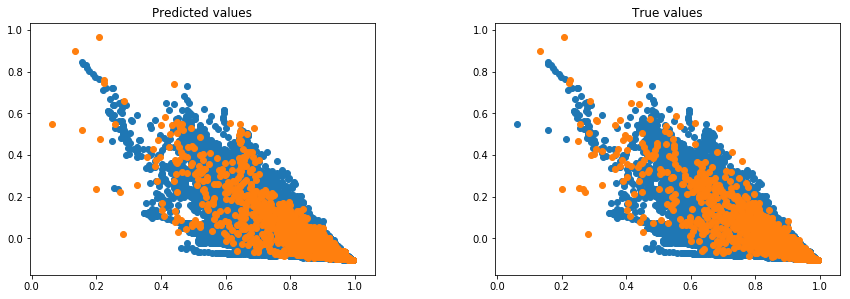

In [60]:
lof = LocalOutlierFactor(n_neighbors=5, n_jobs=-1, contamination=contamination)
lof_pred = lof.fit_predict((df.drop(columns=['id', 'outlier'])))
svd = TruncatedSVD(n_components=2)
svd_true = pd.DataFrame(svd.fit_transform(df.drop(columns=['id', 'outlier'])))
svd_true['outlier'] = true_labels
svd_pred = pd.DataFrame(svd.fit_transform(df.drop(columns=['id', 'outlier'])))
svd_pred['predicted'] = lof_pred
plt.subplot(121)
plt.title('Predicted values')
plt.scatter(svd_pred[0][svd_pred['predicted'] == 1], svd_pred[1][svd_pred['predicted'] == 1])
plt.scatter(svd_pred[0][svd_pred['predicted'] == -1], svd_pred[1][svd_pred['predicted'] == -1])
plt.subplot(122)
plt.title('True values')
plt.scatter(svd_true[0][svd_true['outlier'] == 1], svd_true[1][svd_true['outlier'] == 1])
plt.scatter(svd_true[0][svd_true['outlier'] == -1], svd_true[1][svd_true['outlier'] == -1])
plt.subplots_adjust(top=1, right=2, wspace=0.35)
plt.show()

Despite visually plots built on reduced dimensional data looks quite similar, ARI still is not high, although better than any previous. 